In [1]:
!head weather_forecast_data.csv

In [3]:
import pandas as pd
weather_df = pd.read_csv('weather_forecast_data.csv')
weather_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [4]:
weather_df.shape

(2500, 6)

In [9]:
#Check for missing values
weather_df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [ ]:
## Divide Data in Testing and Training



In [10]:
y = weather_df['Rain'].map({'rain': 1, 'no rain': 0})# Encode the target variable 'Rain' (convert to binary: 'rain' as 1, 'no rain' as 0)
X = weather_df.drop('Rain', axis=1)
X.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [11]:
X.corr()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
Temperature,1.000000,-0.014119,-0.004957,0.006632,-0.007489
Humidity,-0.014119,1.000000,0.003816,0.007244,-0.032089
Wind_Speed,-0.004957,0.003816,1.000000,-0.000405,0.018772
Cloud_Cover,0.006632,0.007244,-0.000405,1.000000,0.023100
Pressure,-0.007489,-0.032089,0.018772,0.023100,1.000000


<Axes: >

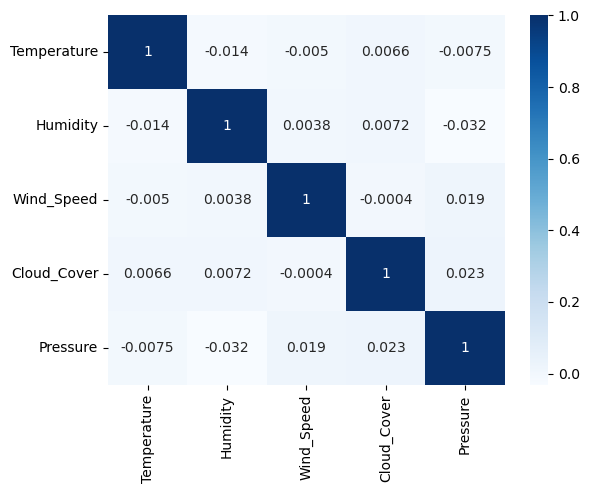

In [13]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True, cmap='Blues')

In [14]:
## Correlation for Rain Data
Rain = X[weather_df['Rain'] == 'rain']
NoRain = X[weather_df['Rain'] == 'no rain']

In [15]:
print(f'# of rain observations: {Rain.shape[0]}')
print(f'# of no rain observations: {NoRain.shape[0]}')

# of rain observations: 314
# of no rain observations: 2186


<Axes: >

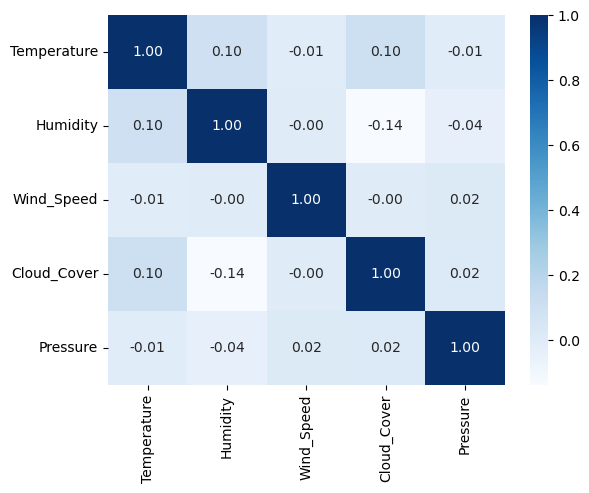

In [16]:
import seaborn as sns

sns.heatmap(NoRain.corr(), annot=True, fmt=".2f", cmap='Blues')
## Correlation for NoRain Data


<Axes: >

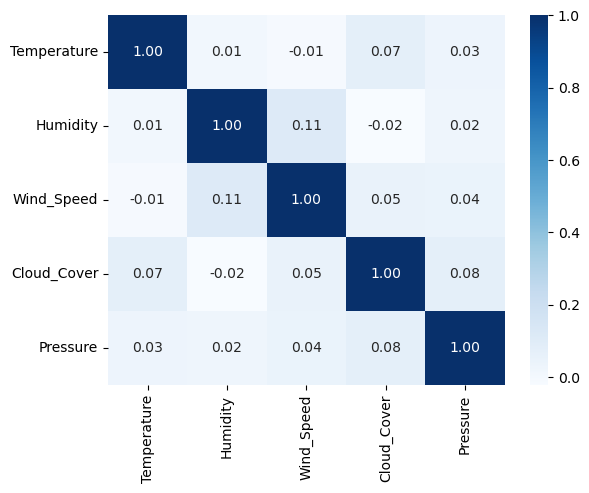

In [17]:
sns.heatmap(Rain.corr(), annot=True, fmt=".2f", cmap='Blues')

If we do an ANOVA or t-test for feature selection of the variables.  cloud cover, humidity and temperature will possibly come out as variables with significant differences.  I hypothesize these variables to aid in the prediction of Rain/No Rain 

## Pending:
- Do t-test
- Do Anova

## Histograms 

Text(0.5, 1.0, 'Wind_Speed')

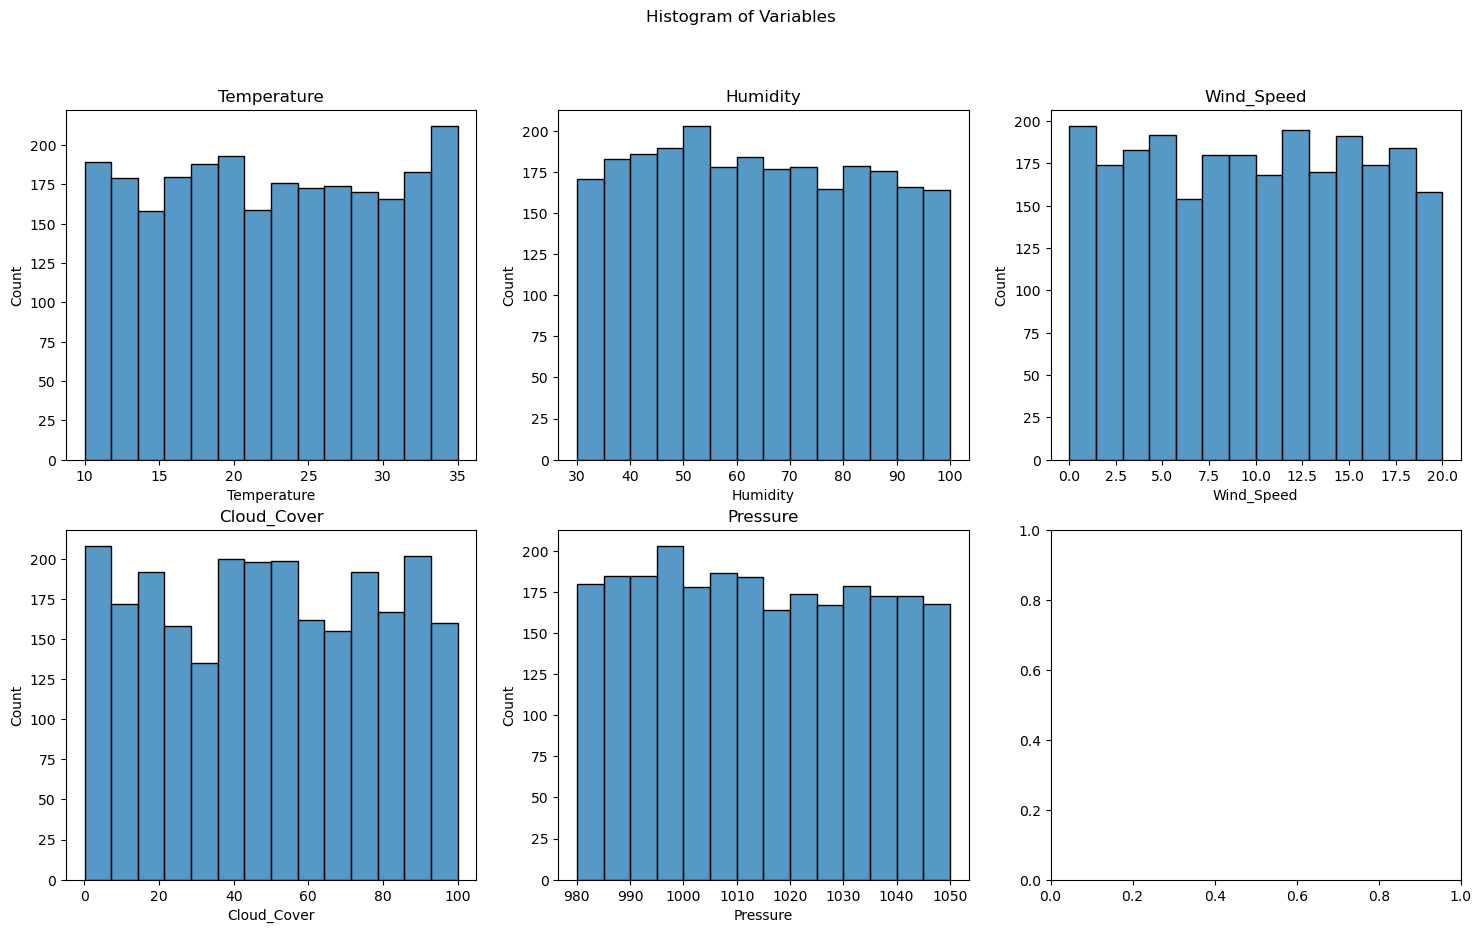

In [45]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histogram of Variables')

sns.histplot(X['Temperature'], ax=axes[0, 0])
axes[0, 0].set_title('Temperature')

sns.histplot(X['Humidity'], ax=axes[0, 1])
axes[0, 1].set_title('Humidity')

sns.histplot(X['Cloud_Cover'], ax=axes[1, 0])
axes[1, 0].set_title('Cloud_Cover')

sns.histplot(X['Pressure'], ax=axes[1, 1])
axes[1, 1].set_title('Pressure')

sns.histplot(X['Wind_Speed'], ax=axes[0, 2])
axes[0, 2].set_title('Wind_Speed')

### Histograms after standarization of variables

In [55]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
standarizer = StandardScaler().set_output(transform="pandas")
Xstd = standarizer.fit_transform(X)



Text(0.5, 1.0, 'Wind_Speed')

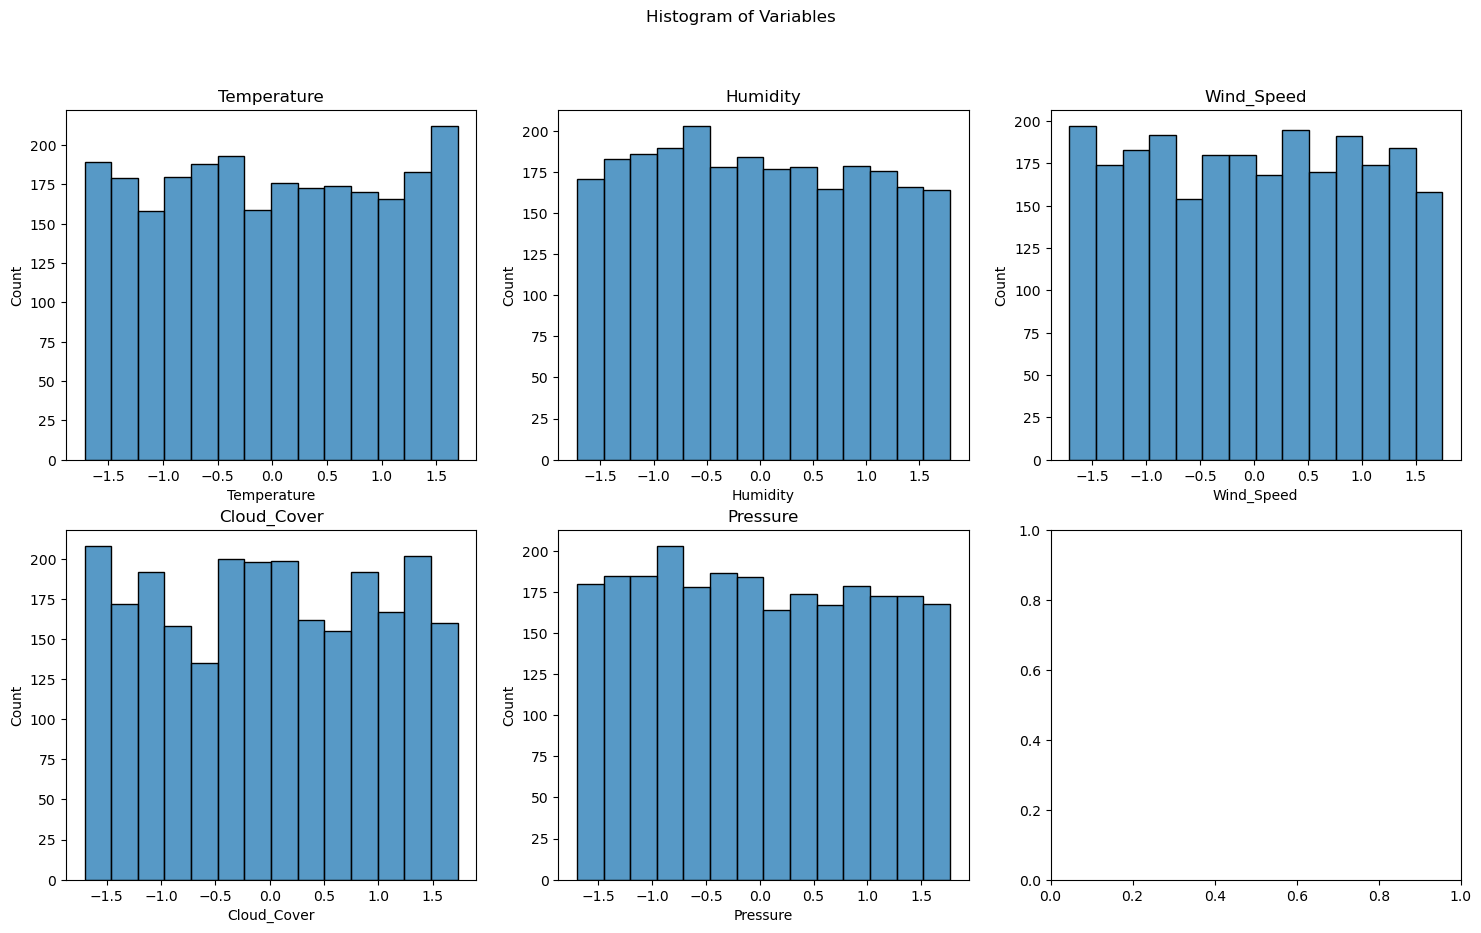

In [56]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histogram of Variables')

sns.histplot(Xstd['Temperature'], ax=axes[0, 0])
axes[0, 0].set_title('Temperature')

sns.histplot(Xstd['Humidity'], ax=axes[0, 1])
axes[0, 1].set_title('Humidity')

sns.histplot(Xstd['Cloud_Cover'], ax=axes[1, 0])
axes[1, 0].set_title('Cloud_Cover')

sns.histplot(Xstd['Pressure'], ax=axes[1, 1])
axes[1, 1].set_title('Pressure')

sns.histplot(Xstd['Wind_Speed'], ax=axes[0, 2])
axes[0, 2].set_title('Wind_Speed')

## Other variable relationships

Text(0.5, 1.0, 'Humidity vs Temperature ')

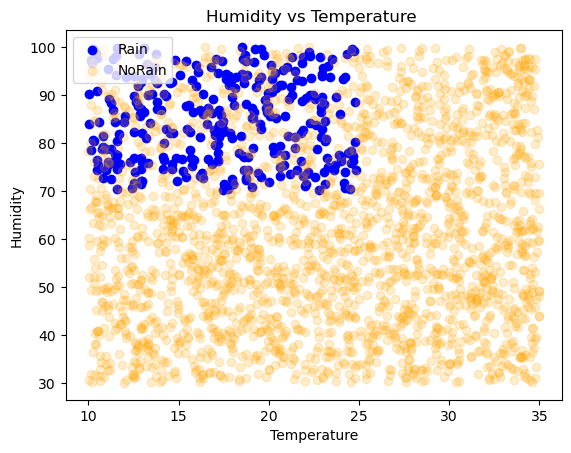

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Rain['Temperature'], Rain['Humidity'], color = 'blue', label = 'Rain')
plt.scatter(NoRain['Temperature'], NoRain['Humidity'], color = 'orange', alpha = 0.2, label = 'NoRain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.title('Humidity vs Temperature ')

In [ ]:
# 3D Plot
from mpl_toolkits import mplot3d

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
plt.scatter(Rain['Temperature'], Rain['Humidity'], color = 'blue')

## Scatter Matrix